Import Liberaries 

In [29]:
%pip install scipy

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\DELL2025\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


read the file

In [30]:
pd_ab_testing = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\marketing_AB.csv')

EDA

In [31]:
pd_ab_testing.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [32]:
pd_ab_testing.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [33]:
pd_ab_testing.duplicated().sum()

np.int64(0)

In [34]:
pd_ab_testing.drop('Unnamed: 0',axis=1)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [35]:
pd_ab_testing.describe().round(3)

,Unnamed: 0,user id,total ads,most ads hour
count,588101.00,588101.000,588101.000,588101.000
mean,294050.00,1310692.216,24.821,14.469
std,169770.28,202225.983,43.715,4.835
min,0.00,900000.000,1.000,0.000
25%,147025.00,1143190.000,4.000,11.000
50%,294050.00,1313725.000,13.000,14.000
75%,441075.00,1484088.000,27.000,18.000
max,588100.00,1654483.000,2065.000,23.000


In [36]:
pd_ab_testing['converted'] = pd_ab_testing['converted'].replace({True: 1, False: 0})
pd_ab_testing

C:\Users\DELL2025\AppData\Local\Temp\ipykernel_21440\651008023.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd_ab_testing['converted'] = pd_ab_testing['converted'].replace({True: 1, False: 0})


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,0,1,Tuesday,23
588097,588097,1327975,ad,0,1,Tuesday,23
588098,588098,1038442,ad,0,3,Tuesday,23
588099,588099,1496395,ad,0,1,Tuesday,23


calculate total number of conversions per group

In [37]:
pd_ab_testing['converted'].value_counts()
conv=pd_ab_testing[pd_ab_testing['converted']== 1].shape[0]
Non_conv=pd_ab_testing[pd_ab_testing['converted']== 0].shape[0]
print("number of Total convertions  ", conv)
print("number of Total non convertion ", Non_conv)

number of Total convertions   14843
number of Total non convertion  573258


In [38]:
x_exp = pd_ab_testing[pd_ab_testing['test group'] == "ad"].shape[0]
x_con = pd_ab_testing[pd_ab_testing['test group'] == "psa"].shape[0]

print("Number of users in the controlled A group:", x_con)
print("Number of users in the experimental B group:", x_exp)

Number of users in the controlled A group: 23524
Number of users in the experimental B group: 564577


In [39]:
exp = pd_ab_testing[pd_ab_testing["test group"] == "ad"]
con = pd_ab_testing[pd_ab_testing["test group"] == "psa"]
n_exp = exp[exp["converted"] == 1].shape[0]
n_con = con[con["converted"] == 1].shape[0]
print("number of convertions on controled A group ", n_con)
print("number of convertions on expirmental B group ", n_exp)

number of convertions on controled A group  420
number of convertions on expirmental B group  14423


In [40]:
p_con_hat = n_con / x_con
p_exp_hat = n_exp / x_exp
p_pooled_hat = (x_con + x_exp) / (n_con + n_exp)
conversion_rate_uplift = (p_exp_hat - p_con_hat) * 100

print("probability of conversion on controled A group " ,p_con_hat *100 )
print("probability of conversion on experimental B group" ,p_exp_hat *100)
print("probability of conversion on total groups" ,p_pooled_hat)
print(f"Conversion Rate Uplift: B vs. A: {conversion_rate_uplift:.2f}%")

probability of conversion on controled A group  1.785410644448223
probability of conversion on experimental B group 2.5546559636683748
probability of conversion on total groups 39.62143771474769
Conversion Rate Uplift: B vs. A: 0.77%


In [57]:
ad_sum=pd_ab_testing.groupby('test group')['total ads'].sum()['ad']
print("the Total Sum of ads in the Expermintal B Group is " , ad_sum)
psa_sum=pd_ab_testing.groupby('test group')['total ads'].sum()['psa']
print("the Total Sum of ads in the Controled A Group is " , psa_sum)

the Total Sum of ads in the Expermintal B Group is  14014701
the Total Sum of ads in the Controled A Group is  582481


In [58]:
total_sum = ad_sum + psa_sum
psa_percent = psa_sum / total_sum
ad_percent = ad_sum / total_sum
print("the total sum of ads played in all Groups is " , total_sum)
print("the Percent of Controled A Group ad played is " , round(psa_percent,3) * 100 ,"%")
print("the Percent of ad Experimental B Group ad Played is " , round(ad_percent ,3 )* 100 ,"%")

the total sum of ads played in all Groups is  14597182
the Percent of Controled A Group ad played is  4.0 %
the Percent of ad Experimental B Group ad Played is  96.0 %


In [43]:
pd_ab_testing[pd_ab_testing['test group'] == 'ad'].groupby('most ads hour')['test group'].value_counts().sort_values(ascending=False)

most ads hour  test group
13             ad            45485
12             ad            45238
11             ad            44149
14             ad            43779
15             ad            42855
10             ad            37454
16             ad            35963
17             ad            33605
18             ad            31052
9              ad            29802
19             ad            29169
21             ad            28895
20             ad            27846
22             ad            25515
23             ad            19547
8              ad            16968
7              ad             6168
0              ad             5309
2              ad             5152
1              ad             4615
3              ad             2590
6              ad             1985
5              ad              742
4              ad              694
Name: count, dtype: int64

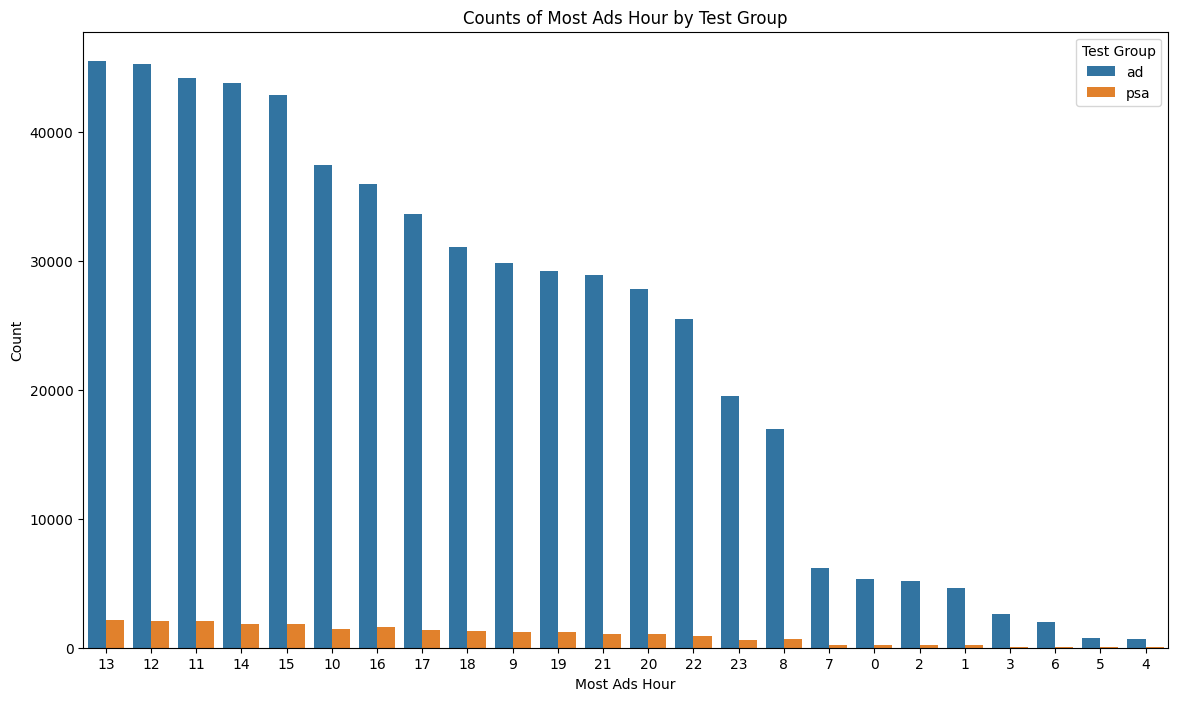

In [76]:
plt.figure(figsize=(14, 8))
sns.countplot(data=pd_ab_testing, x='most ads hour', hue='test group', order=pd_ab_testing['most ads hour'].value_counts().index)
plt.title('Counts of Most Ads Hour by Test Group')
plt.xlabel('Most Ads Hour')
plt.ylabel('Count')
plt.legend(title='Test Group')
plt.show()

In [44]:
pd_ab_testing[pd_ab_testing['test group'] == 'ad'].groupby('most ads day')['test group'].value_counts().sort_values(ascending=False)

most ads day  test group
Friday        ad            88805
Monday        ad            83571
Sunday        ad            82332
Thursday      ad            79077
Saturday      ad            78802
Wednesday     ad            77418
Tuesday       ad            74572
Name: count, dtype: int64

In [45]:
pd_ab_testing[pd_ab_testing['test group'] == 'ad'].groupby(['most ads day','most ads hour'])['test group'].value_counts().sort_values(ascending=False)

most ads day  most ads hour  test group
Friday        13             ad            7166
Sunday        14             ad            6983
Friday        12             ad            6949
Wednesday     12             ad            6938
Friday        11             ad            6927
                                           ... 
Thursday      5              ad              91
Monday        4              ad              88
Saturday      5              ad              88
              4              ad              79
Tuesday       5              ad              76
Name: count, Length: 168, dtype: int64

In [46]:
pd_ab_testing[pd_ab_testing['test group'] == 'psa'].groupby('most ads hour')['test group'].value_counts().sort_values(ascending=False)

most ads hour  test group
13             psa           2170
11             psa           2061
12             psa           2060
14             psa           1869
15             psa           1828
16             psa           1604
10             psa           1485
17             psa           1383
18             psa           1271
9              psa           1202
19             psa           1183
21             psa           1081
20             psa           1077
22             psa            917
8              psa            659
23             psa            619
7              psa            237
0              psa            227
1              psa            187
2              psa            181
3              psa             89
6              psa             83
4              psa             28
5              psa             23
Name: count, dtype: int64

In [47]:
pd_ab_testing[pd_ab_testing['test group'] == 'psa'].groupby('most ads day')['test group'].value_counts().sort_values(ascending=False)

most ads day  test group
Thursday      psa           3905
Friday        psa           3803
Monday        psa           3502
Wednesday     psa           3490
Sunday        psa           3059
Tuesday       psa           2907
Saturday      psa           2858
Name: count, dtype: int64

In [48]:
pd_ab_testing[pd_ab_testing['test group'] == 'psa'].groupby(['most ads day','most ads hour'])['test group'].value_counts().sort_values(ascending=False)

most ads day  most ads hour  test group
Friday        12             psa           370
Thursday      13             psa           368
Wednesday     13             psa           368
              12             psa           367
Tuesday       11             psa           361
                                          ... 
Wednesday     5              psa             3
Monday        5              psa             2
Sunday        4              psa             2
Wednesday     4              psa             2
Sunday        5              psa             1
Name: count, Length: 167, dtype: int64

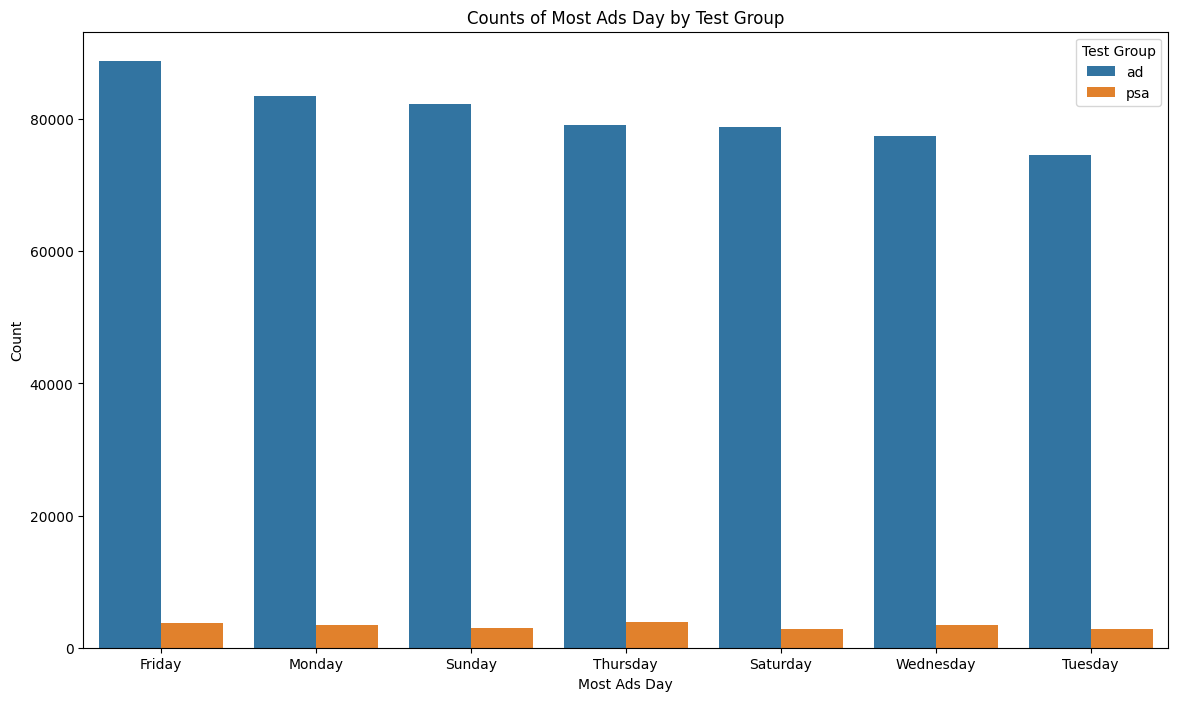

In [75]:
plt.figure(figsize=(14, 8))
sns.countplot(data=pd_ab_testing, x='most ads day', hue='test group', order=pd_ab_testing['most ads day'].value_counts().index)
plt.title('Counts of Most Ads Day by Test Group')
plt.xlabel('Most Ads Day')
plt.ylabel('Count')
plt.legend(title='Test Group')
plt.show()

<Axes: >

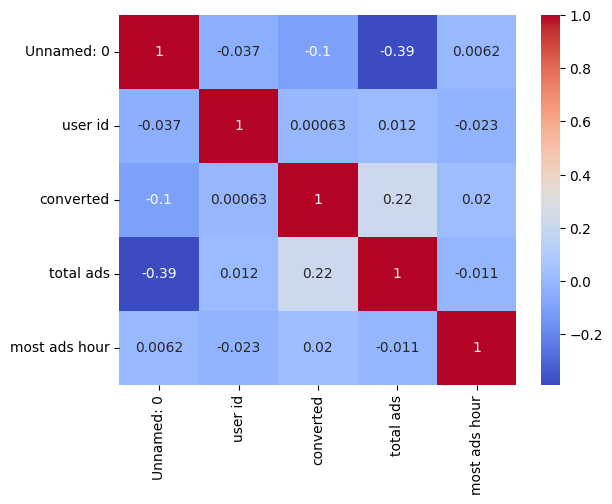

In [49]:
# Select only numeric columns
numeric_columns = pd_ab_testing.select_dtypes(include='number')

# Calculate the correlation matrix and plot the heatmap
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')


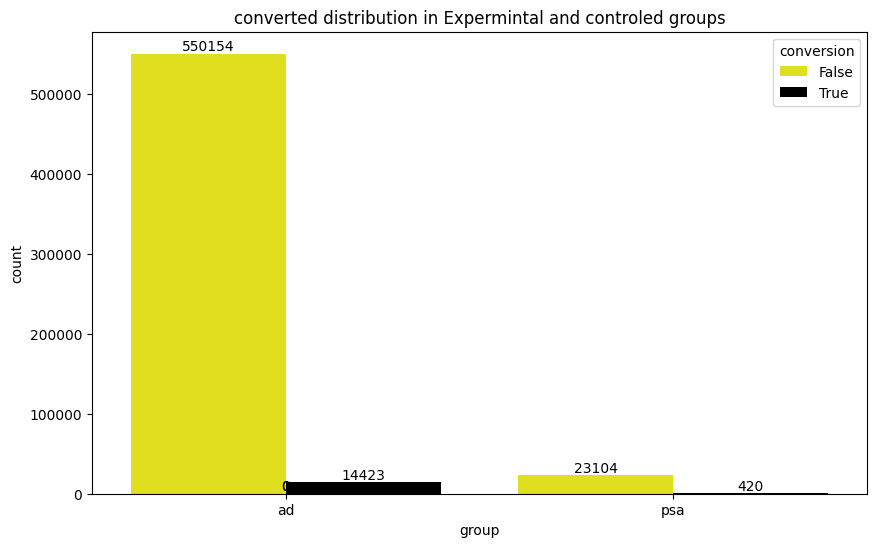

In [50]:
#custom palette to yellow and black
paleete = {True:'Black',False:'Yellow'}
plt.figure(figsize=(10,6))
ax = sns.countplot(x='test group', hue='converted', data=pd_ab_testing, palette=paleete)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('converted distribution in Expermintal and controled groups')
plt.xlabel('group')
plt.ylabel('count')
plt.legend(title='conversion', labels=['False','True']);

In [51]:
alpha =  0.05
print("Alpha : Significance level is (probability of Type 1 error false positive) ",alpha)


delta = 0.01
print("delta : minimum dectectable effect is ",delta)


Alpha : Significance level is (probability of Type 1 error false positive)  0.05
delta : minimum dectectable effect is  0.01


calculated pooled variance 

In [52]:
pooled_variance = (p_con_hat * (1 - p_con_hat) / n_con) + (p_exp_hat * (1 - p_exp_hat) / n_exp)
print("pooled variance is " ,pooled_variance)

pooled variance is  4.3476791715742765e-05


calculate statistic error 

In [53]:
SE= np.sqrt(pooled_variance)
statistical_error = SE * 100
print(f"Statistical Error: {statistical_error:.2f}% (margin of error)")


test_statstics= (p_con_hat - p_exp_hat) / SE
print("test statistics for 2sample z_test is",test_statstics)


z_critical = norm.ppf(1-alpha/2)
print("z critical value of standard normal distribution is",z_critical)
print("we can't reject null hyposesis as" ,(test_statstics), "is less than",(z_critical))


Statistical Error: 0.66% (margin of error)
test statistics for 2sample z_test is -1.1666379991425004
z critical value of standard normal distribution is 1.959963984540054
we can't reject null hyposesis as -1.1666379991425004 is less than 1.959963984540054


calculate p_values fom z-test

low p_value (p<=0.05 at significance value) indicate strong evidance against the null hyposesis , regect null hyposesis

high p_value (p>0.05 at significance value) indicate weak evidance against the null hyposesis , fail to regect null hyposesis

In [54]:
p_value = 2*norm.sf(abs(test_statstics))


def is_statistical_significance(p_value,alpha):
    print(f"p_value of the 2saple z-test {round(p_value,3)}")

    if p_value <= alpha :
        print("there is statitical esignificance  , indicate that the observed differances between groups are unlikly to occured by chance  , Reject the null hypothesis")

    else:
        print("there is no statitical esignificance  , indicate that the observed differances between groups are likly to occurred by chance ,Fail to reject the null hypothesis ")

is_statistical_significance(p_value,alpha)

p_value of the 2saple z-test 0.243
there is no statitical esignificance  , indicate that the observed differances between groups are likly to occurred by chance ,Fail to reject the null hypothesis 


calculate confidance interval of the test , the narrower the more quailty results 

A positive CI (e.g.,[+0.02,+0.05]) suggests the experimental group performs better.

A CI crossing 0 (e.g.,[−0.01,+0.03]) suggests no statistically significant difference.

In [55]:
CI = [ round((p_exp_hat - p_con_hat) - SE * z_critical , 3),
       round((p_exp_hat - p_con_hat) + SE * z_critical , 3)
]

print("the confidance interval of the 2 sample z-test is " , CI)
print("CI crossing 0" ,(CI) ,"suggests no statistically significant difference ")

the confidance interval of the 2 sample z-test is  [np.float64(-0.005), np.float64(0.021)]
CI crossing 0 [np.float64(-0.005), np.float64(0.021)] suggests no statistically significant difference 


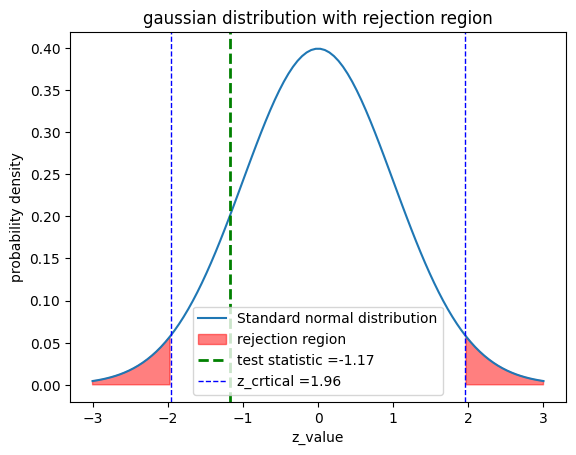

In [56]:
Mu = 0
sigma = 1
x = np.linspace(Mu - 3*sigma , Mu + 3*sigma , 100)
y = norm.pdf(x,Mu,sigma)

plt.plot(x,y,label='Standard normal distribution')
plt.fill_between(x,y,where=(x>z_critical)|(x<-z_critical),color = 'red', alpha =0.5 , label = 'rejection region')
plt.axvline(test_statstics,color ='green' , linestyle = 'dashed' , linewidth = 2 , label =f'test statistic ={test_statstics:.2f} ')
plt.axvline(z_critical,color ='blue' , linestyle = 'dashed' , linewidth = 1 , label =f'z_crtical ={z_critical:.2f} ')
plt.axvline(-z_critical,color ='blue' , linestyle = 'dashed' , linewidth = 1 )

plt.xlabel('z_value')
plt.ylabel('probability density')
plt.title('gaussian distribution with rejection region')
plt.legend()
plt.show()